# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## Mục lục
- [I. Thông tin nhóm](#i)
- [II. Thu thập dữ liệu](#ii)
    - [1. Chủ đề](#ii1)
    - [2. Nguồn dữ liệu](#ii2)
    - [3. Cách thu thập](#ii3)
- [III. Khám phá dữ liệu](#iii)
- [IV. Đặt câu hỏi có ý nghĩa và trả lời](#iv)
    - [1. Câu hỏi 1](#iv1)
    - [2. Câu hỏi 2](#iv2)
    - [3. Câu hỏi 3](#iv3)
    - [4. Câu hỏi 4](#iv4)
- [V. Nhận xét quá trình làm đồ án](#v)
    - [1. Thành viên 1](#v1)
    - [2. Thành viên 2](#v2)
    - [3. Thành viên 3](#v3)
    - [4. Ý kiến nhóm](#v4)
- [Tài liệu tham khảo](#tltk)


## I. Thông tin nhóm <a id="i"></a>

| Họ tên                | MSSV              | Công việc | Hoàn thành(%)|
|-----------------------|-------------------|-----------|--------------|
|Nguyễn Tiến Quốc      |   22120300        |           | 100%         |
|Nguyễn Trung Quôc      |   22120301        |           | 100%         |
|Võ Thành Tâm      |   22120324        |           | 100%         |

## II. Thu thập dữ liệu <a id="ii"></a>

### 1. Chủ đề <a id="ii1"></a>

### 2. Nguồn dữ liệu <a id="ii2"></a>

### 3. Cách thu thập <a id="ii3"></a>

## III. Khám phá dữ liệu  <a id="iii"></a>

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

### Những đặc trưng nào ảnh hưởng tới giá cả của laptop? Các thương hiệu nào cung cấp cấu hình cao với giá cả hợp lý nhất?

### Tiền xử lí:

In [1]:
# Thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('./Dataset/laptop_price.csv', encoding='Latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
# Trích xuất GHz từ chuỗi CPU
def extract_cpu_speed(cpu_str):
    match = re.search(r'(\d+\.?\d*)GHz', cpu_str)
    return float(match.group(1)) if match else 0

df['CPU_GHz'] = df['Cpu'].apply(extract_cpu_speed)


In [4]:
# Trích xuất RAM in GB
df['RAM_GB'] = df['Ram'].apply(lambda x: int(re.search(r'(\d+)GB', x).group(1)) if pd.notnull(x) else 0)

Các Nhóm Phân Loại GPU:

- Intel Graphics: Bao gồm các GPU như Intel HD Graphics, Intel Iris, Intel UHD Graphics, v.v.
- Nvidia GeForce High-End: Bao gồm các GPU dòng GeForce cao cấp như Nvidia GeForce GTX 10xx, Nvidia GeForce RTX, ...
- Nvidia GeForce Mid/Low-End: Bao gồm các GPU dòng GeForce tầm trung và thấp như Nvidia GeForce GTX 9xx, ...
- Nvidia Quadro: Bao gồm các GPU dòng Quadro như Nvidia Quadro M1200, Nvidia Quadro M2200M, ...
- AMD Radeon High-End: Bao gồm các GPU dòng Radeon cao cấp như AMD Radeon RX 5xx, AMD Radeon RX 6xx, ...
- AMD Radeon Mid/Low-End: Bao gồm các GPU dòng Radeon tầm trung và thấp như AMD Radeon R5, ...
- AMD FirePro: Bao gồm các GPU dòng FirePro như AMD FirePro W4190M, AMD FirePro W5130M, ...
- ARM Mali: Bao gồm các GPU như ARM Mali T860 MP4.
- Other: Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng.

In [5]:
# Lấy danh sách các loại CPU duy nhất
unique_gpu_types = df['Gpu'].unique()

'''
# Hiển thị các loại CPU
print("Các loại GPU trong dataset:")
for gpu in unique_gpu_types:
    print(f"- {gpu}")
'''
    
# Trích xuất loại GPU (nếu Nvidia GeForce, AMD Radeon, Intel HD, ...)
def extract_gpu_type(gpu_str):
    if pd.isnull(gpu_str):
        return 'Unknown'
    
    gpu_str_lower = gpu_str.lower()
    
    # Intel Graphics
    if ('intel hd graphics' in gpu_str_lower or
        'intel iris' in gpu_str_lower or
        'intel uhd graphics' in gpu_str_lower):
        return 'Intel Graphics'
    
    # Nvidia GeForce
    elif 'nvidia geforce' in gpu_str_lower:
        # Phân biệt GeForce cao cấp và thấp/mid-range dựa trên số hiệu
        if re.search(r'geforce\s+gtx\s+10\d0', gpu_str_lower) or 'geforce rtx' in gpu_str_lower:
            return 'Nvidia GeForce High-End'
        else:
            return 'Nvidia GeForce Mid/Low-End'
    
    # Nvidia Quadro
    elif 'nvidia quadro' in gpu_str_lower:
        return 'Nvidia Quadro'
    
    # AMD Radeon
    elif 'amd radeon pro' in gpu_str_lower or 'amd radeon rx' in gpu_str_lower or 'amd radeon' in gpu_str_lower:
        # Phân biệt Radeon cao cấp và thấp/mid-range dựa trên số hiệu
        if re.search(r'radeon\s+rx\s+5\d0', gpu_str_lower) or re.search(r'radeon\s+rx\s+6\d0', gpu_str_lower):
            return 'AMD Radeon High-End'
        else:
            return 'AMD Radeon Mid/Low-End'
    
    # AMD FirePro
    elif 'amd firepro' in gpu_str_lower:
        return 'AMD FirePro'
    
    # ARM Mali
    elif 'arm mali' in gpu_str_lower:
        return 'ARM Mali'
    
    else:
        return 'Other'
    
df['GPU_Type'] = df['Gpu'].apply(extract_gpu_type)

Cơ sở để gán điểm số cho từng loại GPU:

1. Nvidia GeForce High-End (Điểm: 4):
- Lý Do: Đây là dòng GPU cao cấp của Nvidia, thường được sử dụng cho gaming, thiết kế đồ họa chuyên sâu, và các ứng dụng yêu cầu hiệu năng cao. Các model như GTX 1070, GTX 1080, RTX Series cung cấp hiệu năng vượt trội.

2. AMD Radeon High-End (Điểm: 4):
- Tương tự như Nvidia GeForce cao cấp, AMD Radeon High-End như RX 5700, RX 6800 cung cấp hiệu năng mạnh mẽ cho gaming và các ứng dụng đồ họa nặng.

3. Nvidia Quadro và AMD FirePro (Điểm: 3):
- Các GPU này được thiết kế chuyên dụng cho công việc đồ họa chuyên sâu, xử lý video, và các ứng dụng CAD/CAM. Chúng cung cấp hiệu năng tốt nhưng không dành cho gaming.

4. Nvidia GeForce Mid/Low-End và AMD Radeon Mid/Low-End (Điểm: 2):
- Các GPU này phù hợp với gaming nhẹ, xử lý đồ họa trung bình và các ứng dụng thông thường. Chúng cung cấp hiệu năng vừa phải với mức giá hợp lý.

5. Intel Graphics (Điểm: 1):
- Đây là GPU tích hợp trong CPU, phù hợp với các tác vụ cơ bản như lướt web, xem video, và làm việc văn phòng. Hiệu năng thấp hơn so với các GPU rời.

6. ARM Mali (Điểm: 0.5):
- GPU này thường được sử dụng trong các thiết bị di động như tablet và smartphone. Hiệu năng thấp, không phù hợp với các tác vụ đồ họa nặng.

7. Other (Điểm: 1):
- Bao gồm các GPU không thuộc các nhóm trên hoặc không rõ ràng. Được gán điểm số mặc định là 1.

In [6]:
# Hàm đánh giá điểm số GPU
def gpu_rank(gpu_type):
    gpu_type_lower = gpu_type.lower()
    
    if 'geforce high-end' in gpu_type_lower or 'radeon high-end' in gpu_type_lower:
        return 4  # GPU cao cấp, hiệu năng cao
    elif 'geforce mid/low-end' in gpu_type_lower or 'radeon mid/low-end' in gpu_type_lower:
        return 2  # GPU trung bình/thấp, hiệu năng vừa
    elif 'quadro' in gpu_type_lower or 'firepro' in gpu_type_lower:
        return 3  # GPU chuyên dụng cho công việc đồ họa, hiệu năng tốt
    elif 'intel graphics' in gpu_type_lower:
        return 1  # GPU tích hợp, hiệu năng thấp
    elif 'arm mali' in gpu_type_lower:
        return 0.5  # GPU ARM, thường dùng trong thiết bị di động, hiệu năng thấp
    else:
        return 1  # Default
df['GPU_Rank'] = df['GPU_Type'].apply(gpu_rank)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPU_GHz,RAM_GB,GPU_Type,GPU_Rank
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,8,Intel Graphics,1.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,8,Intel Graphics,1.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,8,Intel Graphics,1.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,16,AMD Radeon Mid/Low-End,2.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,8,Intel Graphics,1.0


Các nhóm phân loại CPU
- Intel Core i9: Bao gồm các CPU như Intel Core i9-9900K, Intel Core i9-8950HK, ...
- Intel Core i7: Bao gồm các CPU như Intel Core i7-8750H, Intel Core i7-8550U, ...
- Intel Core i5: Bao gồm các CPU như Intel Core i5-8250U, Intel Core i5-7200U, ...
- Intel Core i3: Bao gồm các CPU như Intel Core i3-7100U, Intel Core i3-6006U, ...
- Intel Xeon: Bao gồm các CPU như Intel Xeon E3-1505M, Intel Xeon E3-1535M, ...
- Intel Pentium: Bao gồm các CPU như Intel Pentium N4200, Intel Pentium 4405U, ...
- Intel Celeron: Bao gồm các CPU như Intel Celeron N3350, Intel Celeron N3060, ...
- Intel Atom: Bao gồm các CPU như Intel Atom x5-Z8350, Intel Atom x5-Z8300, ...
- Intel Core M: Bao gồm các CPU như Intel Core M3-7Y30, Intel Core M5-6Y54, ...
- AMD Ryzen: Bao gồm các CPU như AMD Ryzen 7 1700, AMD Ryzen 5 1600, ...
- AMD A-Series: Bao gồm các CPU như AMD A9-9420, AMD A6-9220, ...
- AMD E-Series: Bao gồm các CPU như AMD E2-9000e, AMD E2-6110, ...
- AMD FX-Series: Bao gồm các CPU như AMD FX-9830P, AMD FX-8800P, ...
- AMD FirePro: Bao gồm các CPU như AMD FirePro W4190M, AMD FirePro W5130M, ...
- Samsung Cortex: Bao gồm các CPU như Samsung Cortex A72, Samsung Cortex A53, ...
- Other: Bao gồm các CPU không thuộc các nhóm trên hoặc không rõ ràng.

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.

In [7]:
# Lấy danh sách các loại CPU duy nhất
unique_gpu_types = df['Cpu'].unique()

'''
# Hiển thị các loại CPU
print("Các loại CPU trong dataset:")
for cpu in unique_gpu_types:
    print(f"- {cpu}")
'''

def extract_cpu_type(cpu_str):
    if pd.isnull(cpu_str):
        return 'Unknown'
    
    cpu_str_lower = cpu_str.lower()
    
    # Intel Core i9
    if 'intel core i9' in cpu_str_lower:
        return 'Intel Core i9'
    # Intel Core i7
    elif 'intel core i7' in cpu_str_lower:
        return 'Intel Core i7'
    # Intel Core i5
    elif 'intel core i5' in cpu_str_lower:
        return 'Intel Core i5'
    # Intel Core i3
    elif 'intel core i3' in cpu_str_lower:
        return 'Intel Core i3'
    # Intel Xeon
    elif 'intel xeon' in cpu_str_lower:
        return 'Intel Xeon'
    # Intel Pentium
    elif 'intel pentium' in cpu_str_lower:
        return 'Intel Pentium'
    # Intel Celeron
    elif 'intel celeron' in cpu_str_lower:
        return 'Intel Celeron'
    # Intel Atom
    elif 'intel atom' in cpu_str_lower:
        return 'Intel Atom'
    # Intel Core M
    elif 'intel core m' in cpu_str_lower:
        return 'Intel Core M'
    # AMD Ryzen
    elif 'amd ryzen' in cpu_str_lower:
        return 'AMD Ryzen'
    # AMD A-Series
    elif re.search(r'amd\s+a\d+-series', cpu_str_lower):
        return 'AMD A-Series'
    # AMD E-Series
    elif re.search(r'amd\s+e\d+-series', cpu_str_lower):
        return 'AMD E-Series'
    # AMD FX-Series
    elif 'amd fx' in cpu_str_lower:
        return 'AMD FX-Series'
    # AMD FirePro
    elif 'amd firepro' in cpu_str_lower:
        return 'AMD FirePro'
    # Samsung Cortex
    elif 'samsung cortex' in cpu_str_lower:
        return 'Samsung Cortex'
    else:
        return 'Other'
    
df['CPU_Type'] = df['Cpu'].apply(extract_cpu_type)

Chuyển đổi loại CPU thành điểm số

Mục Tiêu:
- Phân loại các loại CPU từ dataset thành các nhóm chính.
- Gán điểm số tương ứng cho mỗi loại CPU để đánh giá hiệu năng.
- Đảm bảo rằng tất cả các loại CPU trong danh sách đều được xử lý một cách hợp lý.

Các Nhóm Phân Loại CPU và Điểm Số Đề Xuất:

| Nhóm CPU                | Điểm Số |
|-------------------------|---------|
| Intel Core i3           | 1       |
| Intel Core i5           | 2       |
| Intel Core i7           | 3       |
| Intel Core i9           | 4       |
| Intel Xeon              | 4       |
| Intel Pentium           | 0.6     |
| Intel Celeron           | 0.3     |
| Intel Atom              | 0.5     |
| Intel Core M            | 1       |
| AMD A-Series            | 1       |
| AMD E-Series            | 1       |
| AMD FX-Series           | 1       |
| AMD FirePro             | 2       |
| AMD Ryzen               | 3       |
| Samsung Cortex          | 0.5     |
| Khác (Other)            | 1       |

Điểm số đề xuất dựa vào các cơ sở sau:
- Intel Core M: Dòng CPU này thường được sử dụng trong các thiết bị nhẹ, có hiệu năng vừa phải.
- AMD FirePro: Dòng GPU chuyên dụng của AMD, tương đương với hiệu năng cao hơn so với các dòng A-Series.
- Samsung Cortex: GPU ARM, thường dùng trong các thiết bị di động, hiệu năng thấp hơn so với CPU x86.
- Khác (Other): Các loại CPU không thuộc các nhóm trên hoặc không rõ ràng.

In [8]:
# Hàm đánh giá điểm số CPU
def cpu_rank(cpu_type):
    cpu_type_lower = cpu_type.lower()
    
    if 'intel core i9' in cpu_type_lower:
        return 4
    elif 'intel core i7' in cpu_type_lower:
        return 3
    elif 'intel core i5' in cpu_type_lower:
        return 2
    elif 'intel core i3' in cpu_type_lower:
        return 1
    elif 'intel xeon' in cpu_type_lower:
        return 4
    elif 'intel pentium' in cpu_type_lower:
        return 0.6
    elif 'intel celeron' in cpu_type_lower:
        return 0.3
    elif 'intel atom' in cpu_type_lower:
        return 0.5
    elif 'intel core m' in cpu_type_lower:
        return 1
    elif 'amd ryzen' in cpu_type_lower:
        return 3
    elif 'amd a-series' in cpu_type_lower:
        return 1
    elif 'amd e-series' in cpu_type_lower:
        return 1
    elif 'amd fx-series' in cpu_type_lower:
        return 1
    elif 'amd firepro' in cpu_type_lower:
        return 2
    elif 'samsung cortex' in cpu_type_lower:
        return 0.5
    else:
        return 1  # Default

df['CPU_Rank'] = df['Cpu'].apply(cpu_rank)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,CPU_GHz,RAM_GB,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,8,Intel Graphics,1.0,Intel Core i5,2.0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,8,Intel Graphics,1.0,Intel Core i5,2.0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,8,Intel Graphics,1.0,Intel Core i5,2.0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,16,AMD Radeon Mid/Low-End,2.0,Intel Core i7,3.0
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,8,Intel Graphics,1.0,Intel Core i5,2.0


In [9]:
# Tính điểm cấu hình tổng thể
df['Config_Score'] = df['CPU_Rank'] * df['CPU_GHz'] + df['RAM_GB'] + df['GPU_Rank']

# Tính chỉ số "Giá trị cấu hình" = Config_Score / Price_euros
df['Value_Score'] = df['Config_Score'] / df['Price_euros']

Các công thức trên là các phép tính đơn giản và giả định rằng các yếu tố như CPU, RAM, và GPU đều đóng góp tuyến tính vào điểm cấu hình tổng thể. Trong thực tế, sự tương tác giữa các thành phần phần cứng có thể phức tạp hơn.

Trong Config_Score, CPU có trọng số cao hơn (do nhân với CPU_GHz) so với RAM và GPU. Tùy thuộc vào nhu cầu sử dụng (chơi game, văn phòng, :>), có thể điều chỉnh trọng số để phản ánh tầm quan trọng thực tế của từng thành phần.

Lưu ý:

Các yếu tố như chất lượng xây dựng, thời lượng pin, trọng lượng, hệ điều hành, và các tính năng khác cũng ảnh hưởng đến quyết định mua sắm nhưng không được tính trong Config_Score và Value_Score.

GPU_Rank có thể cần được điều chỉnh để phản ánh đúng hiệu năng thực tế của từng loại GPU. Ví dụ, các GPU chuyên dụng như Nvidia Quadro có thể cần điểm cao hơn so với các GPU GeForce mid-range nếu mục tiêu là phân tích về công việc đồ họa chuyên sâu.

In [10]:
# Chỉ lấy các thương hiệu chính (số lượng mẫu > 2) -> có thể tùy chỉnh
brand_counts = df['Company'].value_counts()
top_brands = brand_counts[brand_counts > 2].index.tolist()
df_top = df[df['Company'].isin(top_brands)]

df_top.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,Weight,Price_euros,CPU_GHz,RAM_GB,GPU_Type,GPU_Rank,CPU_Type,CPU_Rank,Config_Score,Value_Score
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,...,1.37kg,1339.69,2.3,8,Intel Graphics,1.0,Intel Core i5,2.0,13.6,0.010152
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,...,1.34kg,898.94,1.8,8,Intel Graphics,1.0,Intel Core i5,2.0,12.6,0.014017
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,1.86kg,575.00,2.5,8,Intel Graphics,1.0,Intel Core i5,2.0,14.0,0.024348
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,...,1.83kg,2537.45,2.7,16,AMD Radeon Mid/Low-End,2.0,Intel Core i7,3.0,26.1,0.010286
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,...,1.37kg,1803.60,3.1,8,Intel Graphics,1.0,Intel Core i5,2.0,15.2,0.008428


### Trực quan hóa:

Tìm ra những đặc trưng ảnh hưởng tới giá cả của laptop

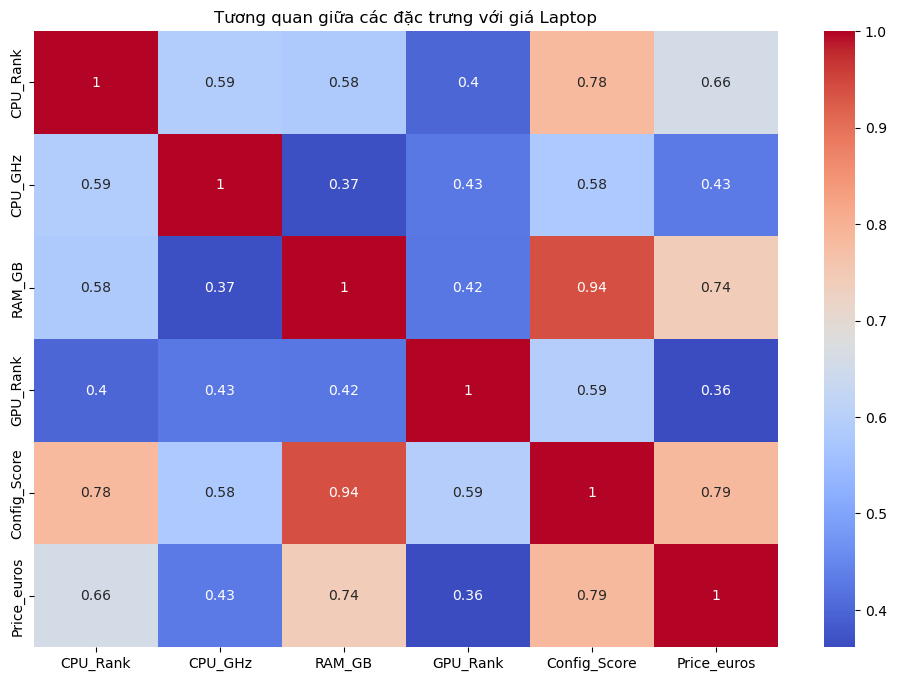

In [16]:

plt.figure(figsize=(12, 8))
sns.heatmap(df[['CPU_Rank', 'CPU_GHz', 'RAM_GB', 'GPU_Rank', 'Config_Score', 'Price_euros']].corr(), annot=True, cmap='coolwarm')
plt.title('Tương quan giữa các đặc trưng với giá Laptop')
plt.show()

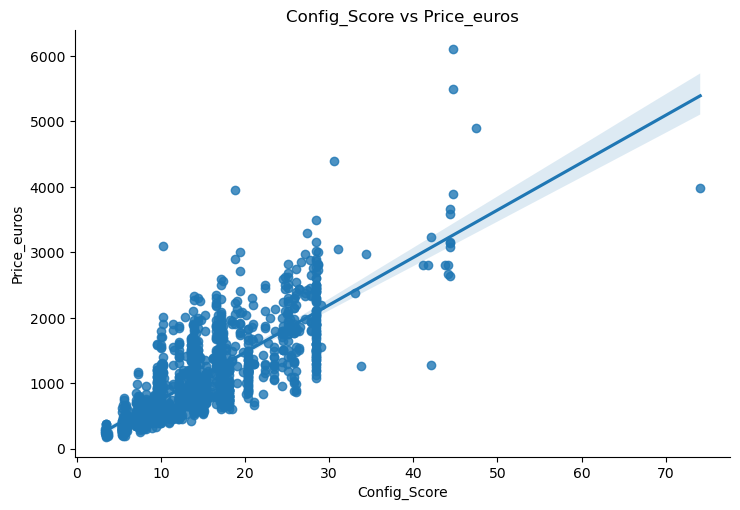

In [17]:
sns.lmplot(x='Config_Score', y='Price_euros', data=df, aspect=1.5)
plt.title('Config_Score vs Price_euros')
plt.show()

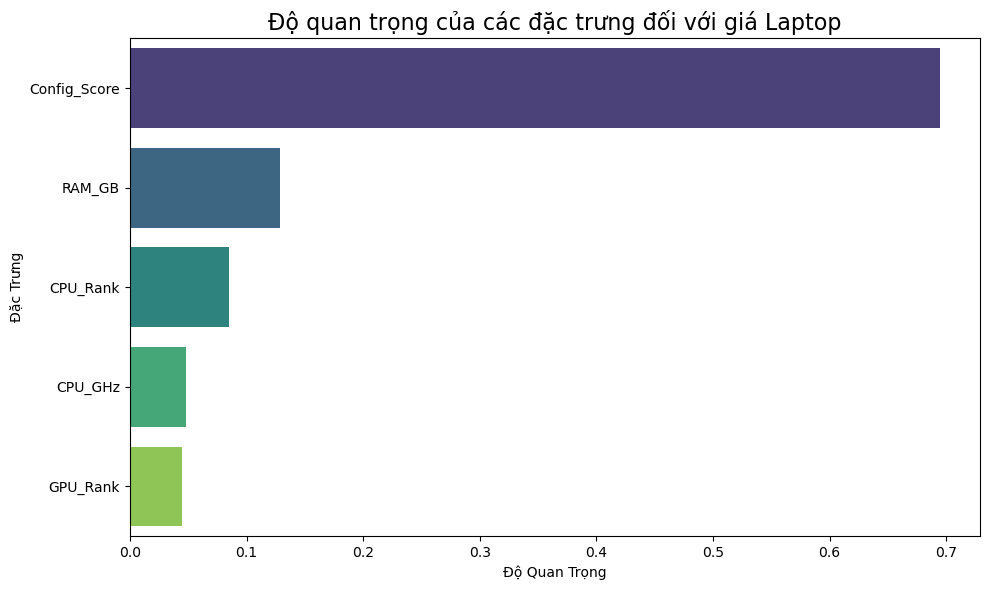

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Feature Importance
features = ['CPU_Rank', 'CPU_GHz', 'RAM_GB', 'GPU_Rank', 'Config_Score']
X = df[features]
y = df['Price_euros']

# Khởi tạo và huấn luyện mô hình
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Tạo DataFrame cho feature importances để dễ dàng vẽ
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    hue='Feature',
    palette='viridis',
    dodge=False
)
plt.title('Độ quan trọng của các đặc trưng đối với giá Laptop', fontsize=16)
plt.xlabel('Độ Quan Trọng')
plt.ylabel('Đặc Trưng')
plt.legend([], [], frameon=False)  # Ẩn legend
plt.tight_layout()
plt.show()

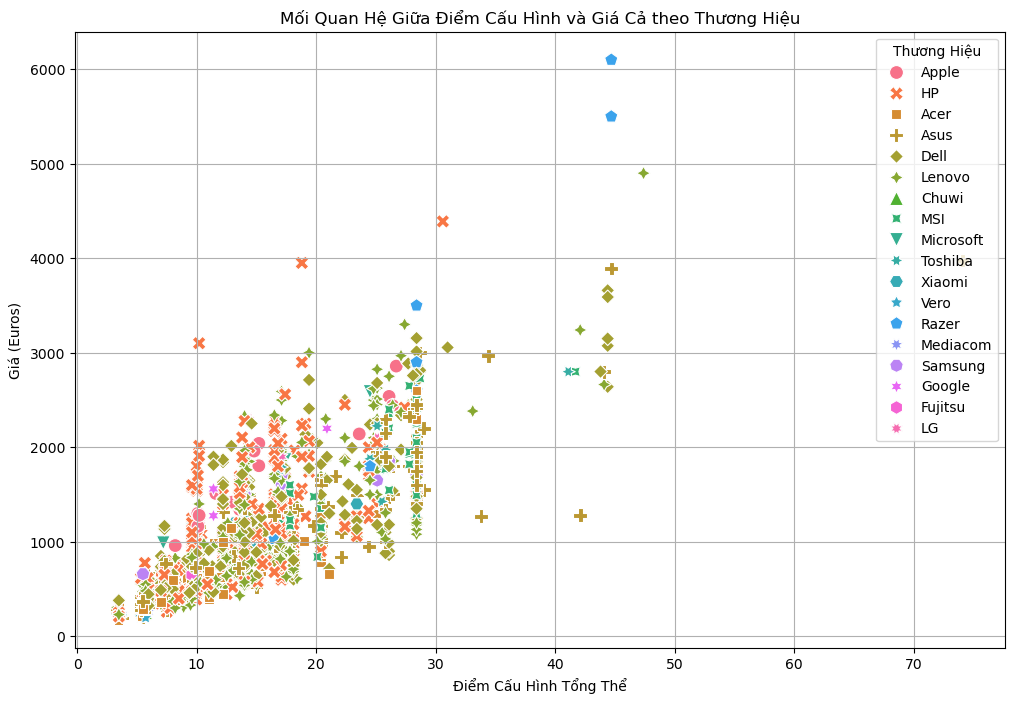

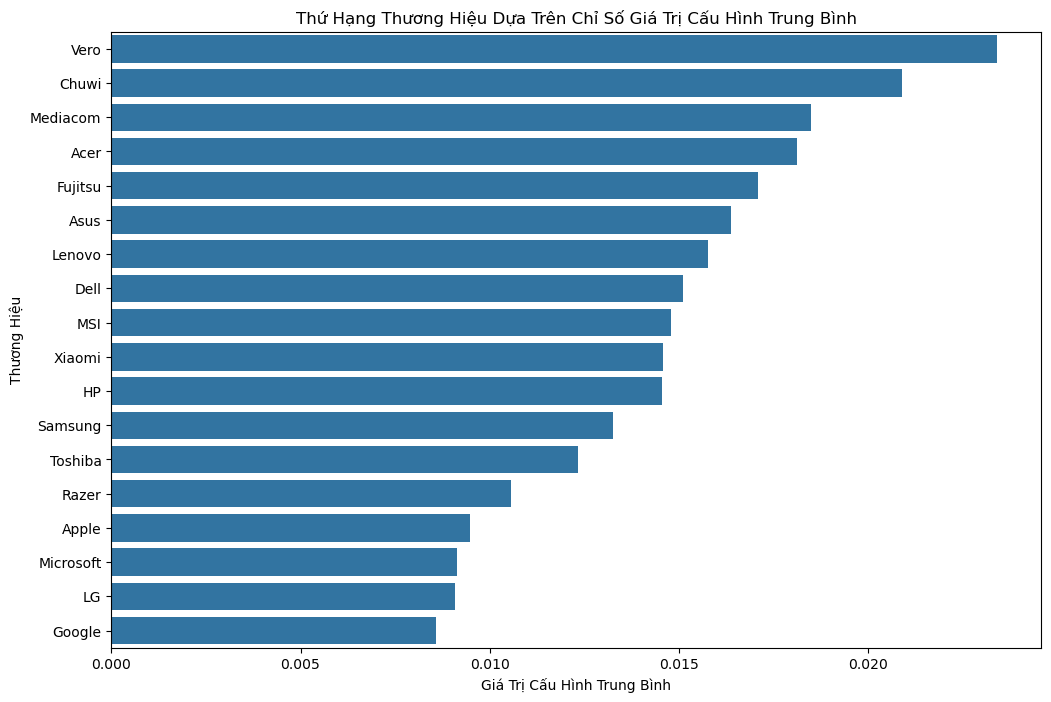

In [14]:
# 1. Biểu đồ Scatter: Config_Score vs Price_euros cho từng thương hiệu
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_top, x='Config_Score', y='Price_euros', hue='Company', style='Company', s=100)
plt.title('Mối Quan Hệ Giữa Điểm Cấu Hình và Giá Cả theo Thương Hiệu')
plt.xlabel('Điểm Cấu Hình Tổng Thể')
plt.ylabel('Giá (Euros)')
plt.legend(title='Thương Hiệu')
plt.grid(True)
plt.show()

# 2. Biểu đồ Bar: Thứ hạng các thương hiệu dựa trên chỉ số "Giá trị cấu hình" trung bình
value_score_mean = df_top.groupby('Company')['Value_Score'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=value_score_mean.values, y=value_score_mean.index)
plt.title('Thứ Hạng Thương Hiệu Dựa Trên Chỉ Số Giá Trị Cấu Hình Trung Bình')
plt.xlabel('Giá Trị Cấu Hình Trung Bình')
plt.ylabel('Thương Hiệu')
plt.show()

### 2. Câu hỏi 2 <a id="iv2"></a>

### 3. Câu hỏi 3 <a id="iv3"></a>

### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

## V. Nhận xét quá trình làm đồ án  <a id="v"></a>

### 1. Thành viên 1  <a id="v1"></a>

### 2. Thành viên 2  <a id="v2"></a>

### 3. Thành viên 3  <a id="v3"></a>

### 4. Ý kiến nhóm  <a id="v4"></a>

Nếu có thêm thời gian thì làm gì?

## Tài liệu tham khảo  <a id="tltk"></a>